In [1]:
from __future__ import print_function
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import argparse
import random as rng
import math

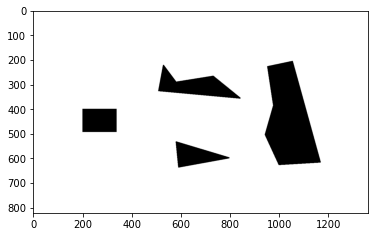

In [2]:
# Importing the image
image = cv2.imread('D:/Education/_Masters/3rd Semester - Spring 2021/Introduction to Robot Vision System/Assignment 2/paperphoto.bmp', 0)

# Visualizing the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [3]:
# Converting the image into boolean values with "False" for values of 255 ('0' represents the Obstacles)
b = image>0

# Converting to '0' and '1', with '0' representing the obstacles
img_2 = b.astype(np.uint32)

# Converting values corresponding to the obstacles to some large value
img_2[img_2 == 0] = 10000
img_2[img_2 == 1] = 0

In [4]:
# Initializing a new image

blank_image = img_2
blank_image = blank_image.astype(np.uint32)
print(blank_image.dtype)

uint32


In [5]:
def distance_transform(img):
    h, w = img.shape

    ld_one = 1
    ld_two = math.sqrt(2)
    
    # Forward Pass
    
    for i in range(h):
        for j in range(w):
            if img[i, j] != 0:
                img[i, j] = min(ld_two + img[i-1, j+1] , ld_one + img[i-1, j] , ld_two + img[i-1, j-1] ,  ld_one + img[i, j-1])
    
    # Backward Pass
    
    for i in range(h-1, -1, -1):
        for j in range(w-1, -1, -1):
            if img[i, j] != 0:
                img[i, j] = min(img[i, j], ld_one + img[i+1, j] , ld_one + img[i, j+1] , ld_two + img[i+1, j+1] ,  ld_two + img[i+1, j-1])
    
    return img

In [6]:
# Output of Distance Transform function
RES = distance_transform(blank_image)
print(RES.shape)

# Stacking channels and changing the dimensions
result = np.stack([RES, RES, RES])
print(result.shape)

final_image = np.rollaxis(result, 0, 3) 
print("Shape of final image", final_image.shape)

(822, 1362)
(3, 822, 1362)
Shape of final image (822, 1362, 3)


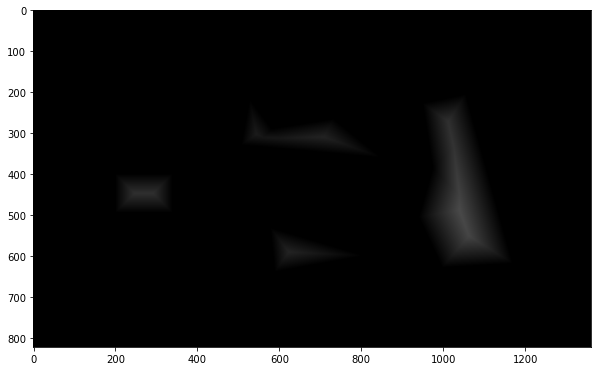

In [7]:
# Visualizing the final image

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.imshow(final_image)
plt.show()

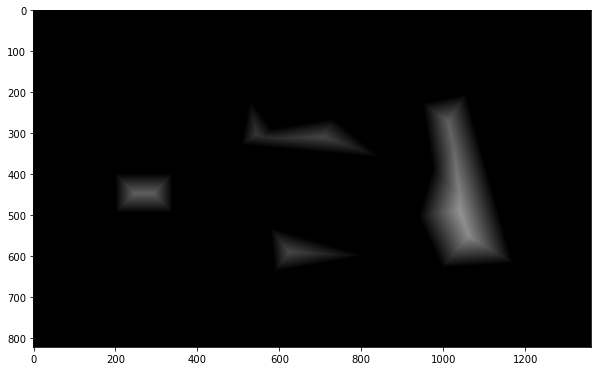

In [8]:
# Increasing the intensity of the image for better visualization


fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
final_image_two = final_image*2
plt.imshow(final_image_two)
plt.show()

## Considering Black blocks as "The Obstacles"

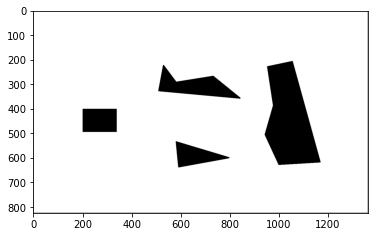

In [2]:
# Importing the image
image = cv2.imread('D:/Education/_Masters/3rd Semester - Spring 2021/Introduction to Robot Vision System/Assignment 2/paperphoto.bmp', cv2.COLOR_BGR2GRAY)
plt.imshow(image)

# Zero-padding the image
padded_img = np.zeros((824, 1364, 3), dtype=np.uint8)
padded_img[1:823, 1:1363] = image

# Reduction of channels
one_D = padded_img[:, :, 0]

# Visualizing the image
plt.imshow(cv2.cvtColor(one_D, cv2.COLOR_BGR2RGB))

In [3]:
# Converting the image into boolean values with "False" for values of 255 ('0' represents the Obstacles)
b = one_D>0

# Converting to '0' and '1', with '0' representing the obstacles and '1' representing the blank area
img_2 = b.astype(np.uint32)

# Converting values corresponding to the blank area as some large value
img_2[img_2 == 0] = 0
img_2[img_2 == 1] = 10000

In [4]:
# Initializing a new image

blank_image = np.copy(img_2)
blank_image = blank_image.astype(np.uint32)
print(blank_image.dtype)

uint32


In [5]:
print(blank_image.shape)

(824, 1364)


In [6]:
print(one_D.shape)
print(image.shape)

(824, 1364)
(822, 1362, 3)


In [9]:
def distance_transform(img, non_padded):
    h, w, d = non_padded.shape

    ld_one = 1
    ld_two = math.sqrt(2)
    
    # Forward Pass
    
    for i in range(1, h+1):
        for j in range(1, w+1):
            if img[i, j] != 0:
                img[i, j] = min(ld_two + img[i-1, j+1] , ld_one + img[i-1, j] , ld_two + img[i-1, j-1] ,  ld_one + img[i, j-1])
    
    # Backward Pass
    #for i in reversed(range(h-1, 1)):
        #for j in reversed(range(w-1, 1)):
    for i in range(h+1, 0, -1):
        for j in range(w+1, 0, -1):
            if img[i, j] != 0:
                img[i, j] = min(img[i, j], ld_one + img[i+1, j] , ld_one + img[i, j+1] , ld_two + img[i+1, j+1] ,  ld_two + img[i+1, j-1])
    
    return img

In [10]:
# Output of Distance Transform function
RES = distance_transform(blank_image, image)
print(RES.shape)

# Stacking channels and changing the dimensions
result = np.stack([RES, RES, RES])
print(result.shape)

final_image = np.rollaxis(result, 0, 3) 
print("Shape of final image", final_image.shape)

(824, 1364)
(3, 824, 1364)
Shape of final image (824, 1364, 3)


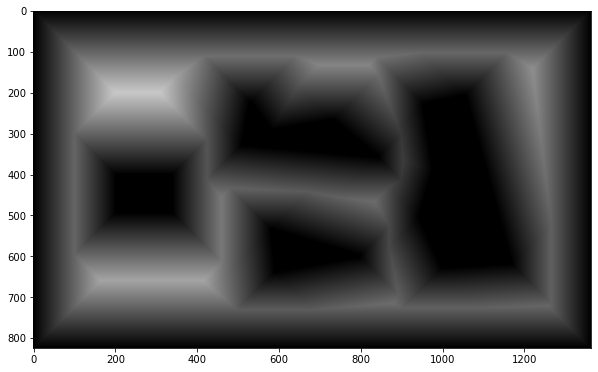

In [11]:
# Visualizing the final image

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.imshow(final_image)
plt.show()